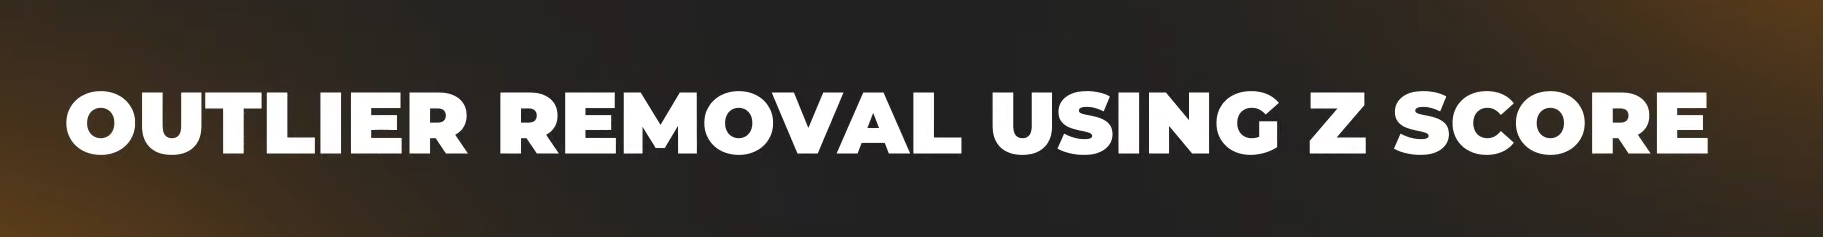

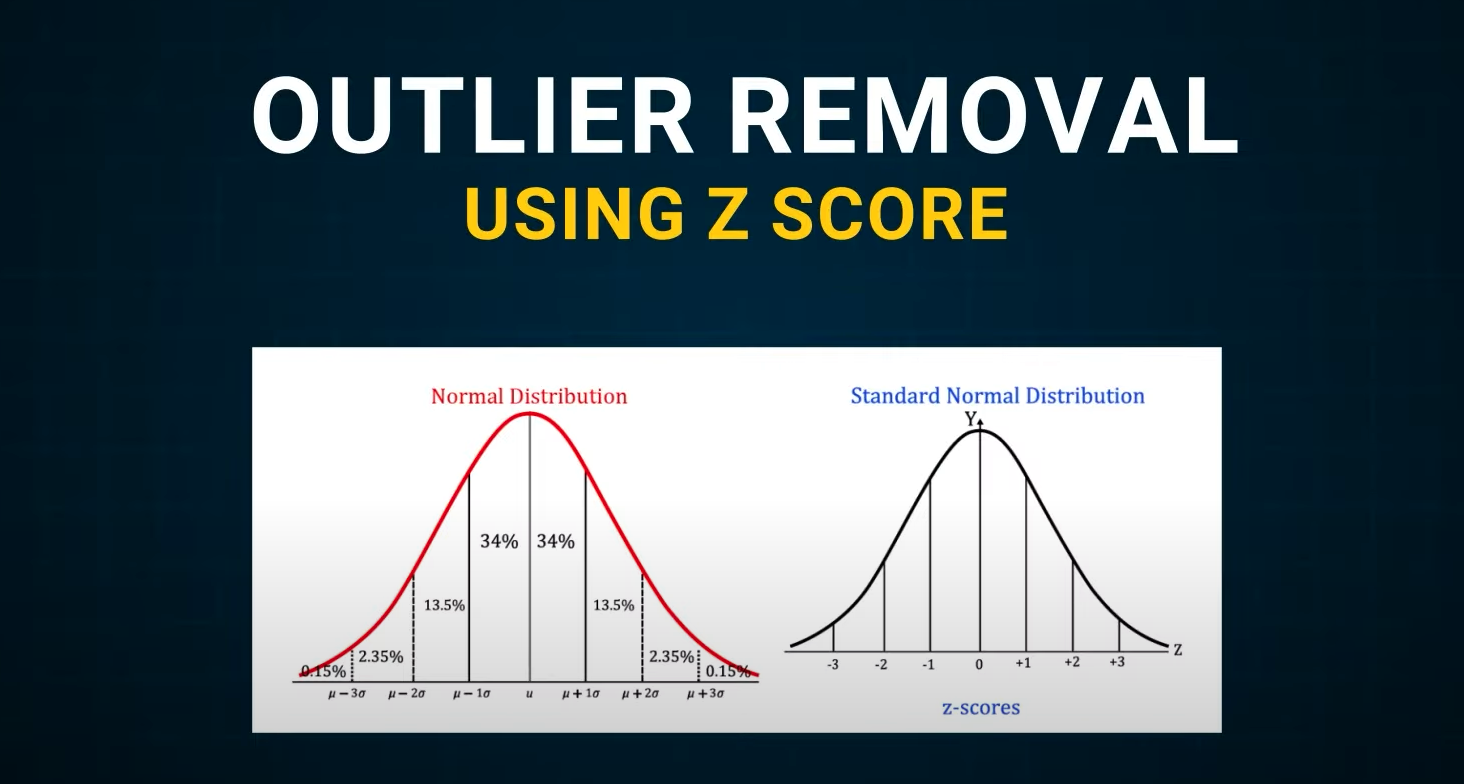

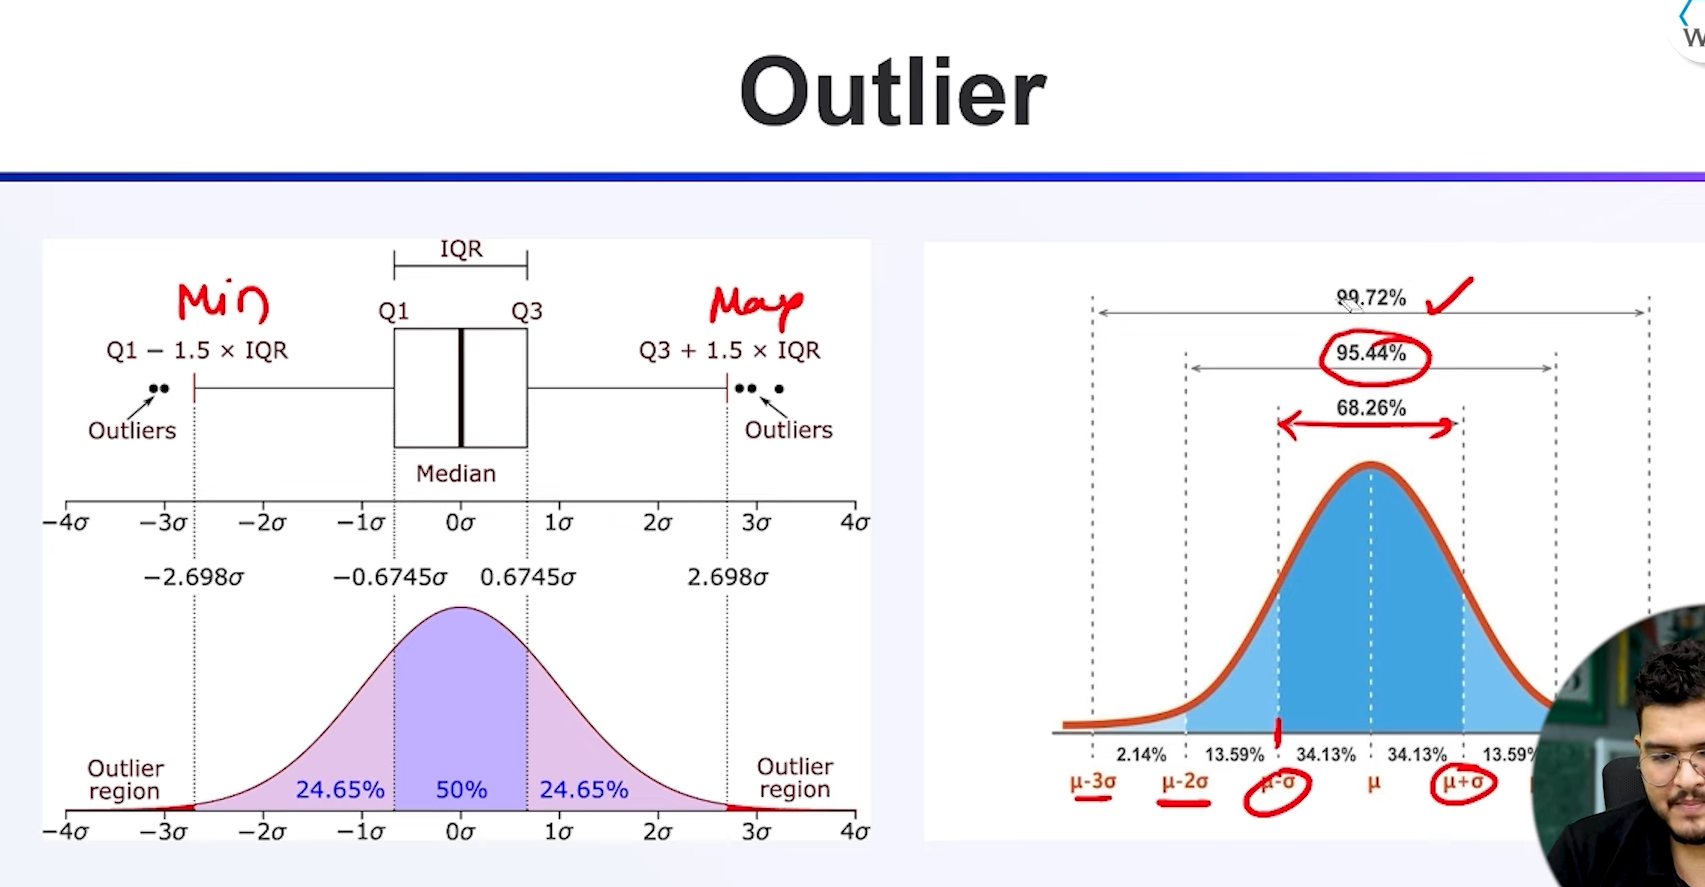

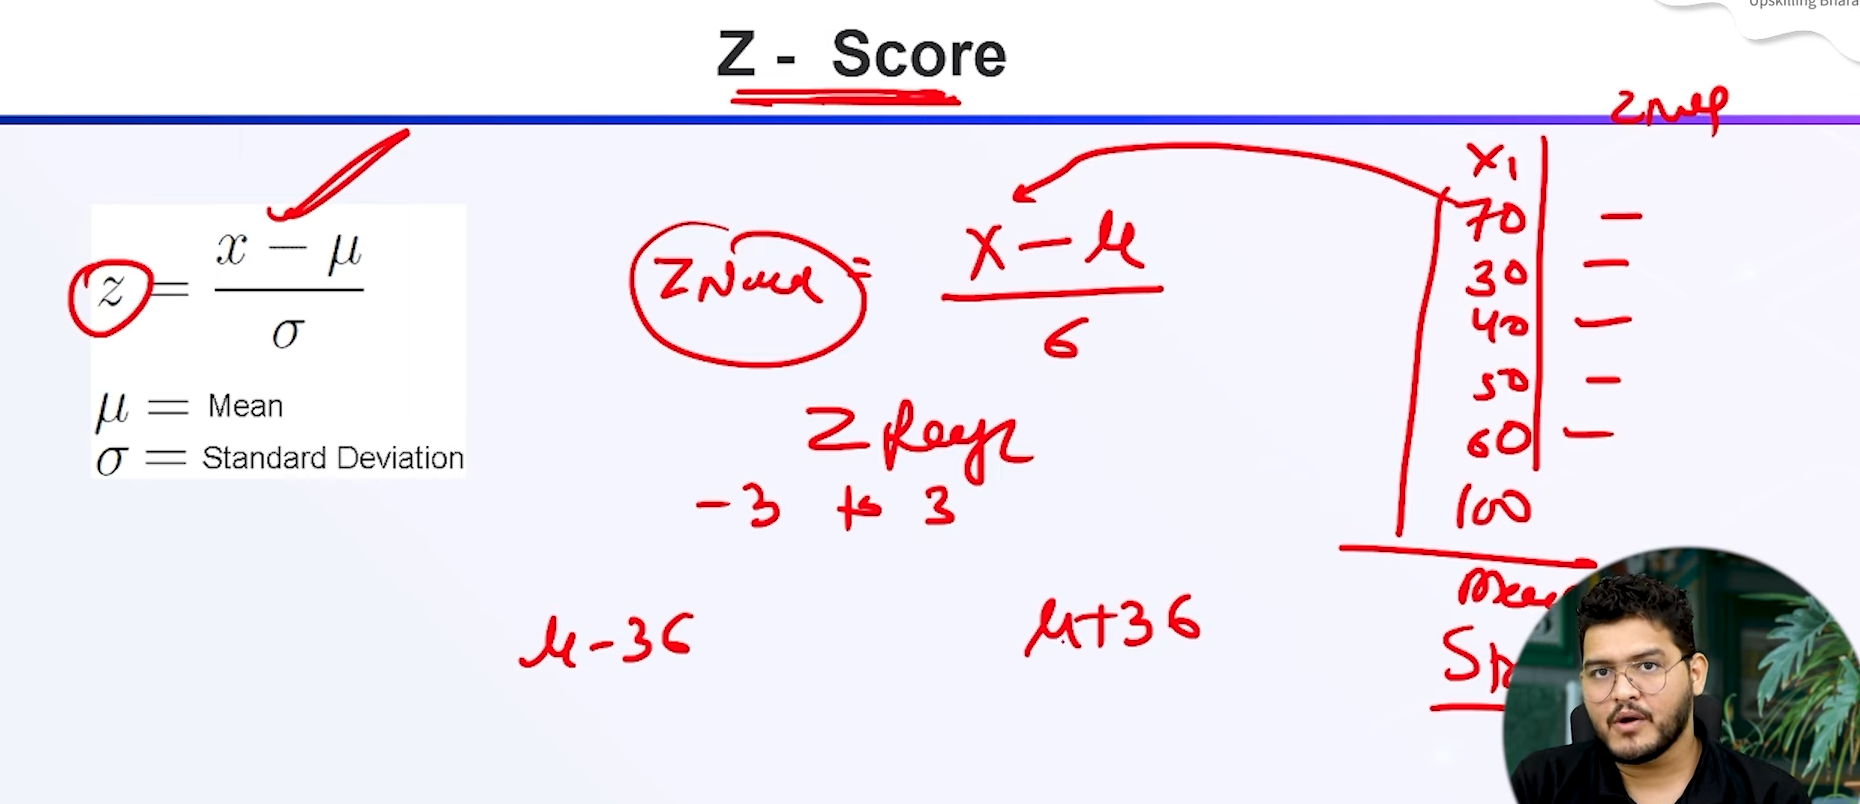

In [1]:
# Importing the Pandas library as pd
import pandas as pd

# Importing the Seaborn library as sns
import seaborn as sns

# Importing the Matplotlib library for plotting
import matplotlib.pyplot as plt

# Reading the CSV file "loan.csv" into a DataFrame named df
df = pd.read_csv("loan.csv")

# Displaying the first three rows of the DataFrame
# df.head(3)


In [2]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


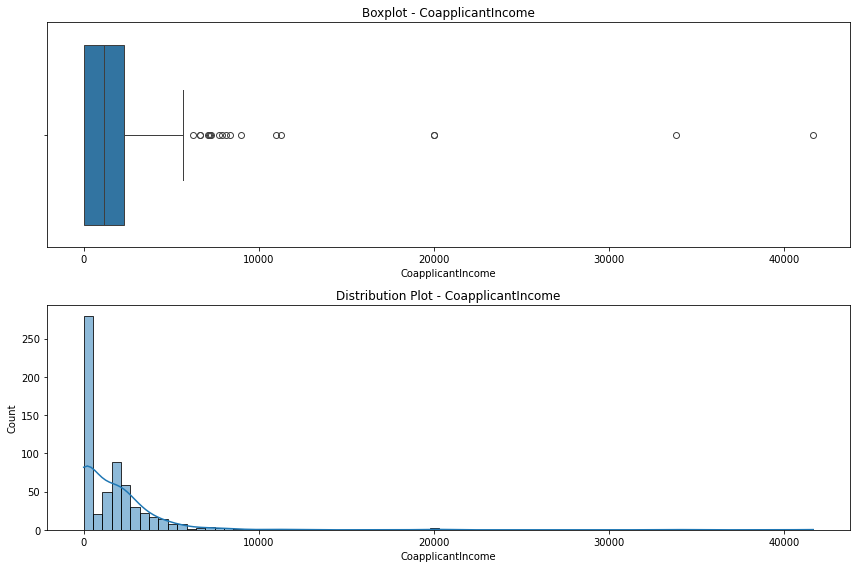

In [4]:
# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Boxplot for the "CoapplicantIncome" column
sns.boxplot(x="CoapplicantIncome", data=df, ax=axes[0])
axes[0].set_title("Boxplot - CoapplicantIncome")

# Distribution plot for the "CoapplicantIncome" column
sns.histplot(df["CoapplicantIncome"], ax=axes[1], kde=True)
axes[1].set_title("Distribution Plot - CoapplicantIncome")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [5]:
# Calculate the minimum and maximum range based on three standard deviations from the mean
min_range = df["CoapplicantIncome"].mean() - (3 * df["CoapplicantIncome"].std())
max_range = df["CoapplicantIncome"].mean() + (3 * df["CoapplicantIncome"].std())

# Display the calculated minimum and maximum ranges
min_range, max_range

# Filter the DataFrame to include only rows within the calculated range
df_new = df[df["CoapplicantIncome"] <= max_range]

# Display the first two rows of the filtered DataFrame
df_new.head(2)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [6]:
# Display the shape of the filtered DataFrame
df_new.shape

(608, 13)

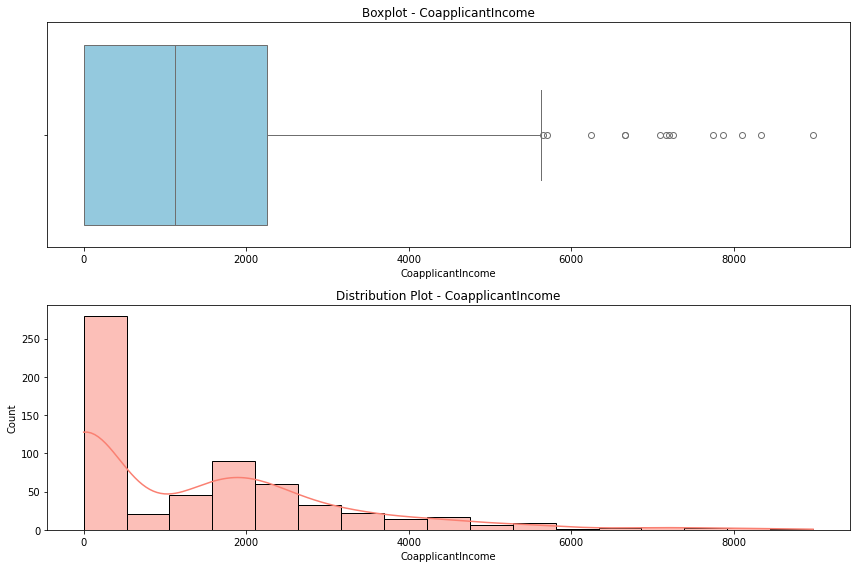

In [7]:
# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Boxplot for the "CoapplicantIncome" column with a different color
sns.boxplot(x="CoapplicantIncome", data=df_new, ax=axes[0], color="skyblue")
axes[0].set_title("Boxplot - CoapplicantIncome")

# Distribution plot for the "CoapplicantIncome" column with a different color
sns.histplot(df_new["CoapplicantIncome"], ax=axes[1], kde=True, color="salmon")
axes[1].set_title("Distribution Plot - CoapplicantIncome")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Z - Score

In [8]:
# Calculate the Z-score for the "CoapplicantIncome" column
z_score = (df["CoapplicantIncome"] - df["CoapplicantIncome"].mean()) / df["CoapplicantIncome"].std()

# Display the calculated Z-scores
z_score

# Add a new column "z_score" to the DataFrame
df["z_score"] = z_score

# Display the first few rows of the DataFrame with the new "z_score" column
df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036


In [9]:
# Filter the DataFrame to include only rows where the Z-score is less than 3
df_new_z = df[df["z_score"] < 3]

# Display the resulting DataFrame
df_new_z.head(2)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700


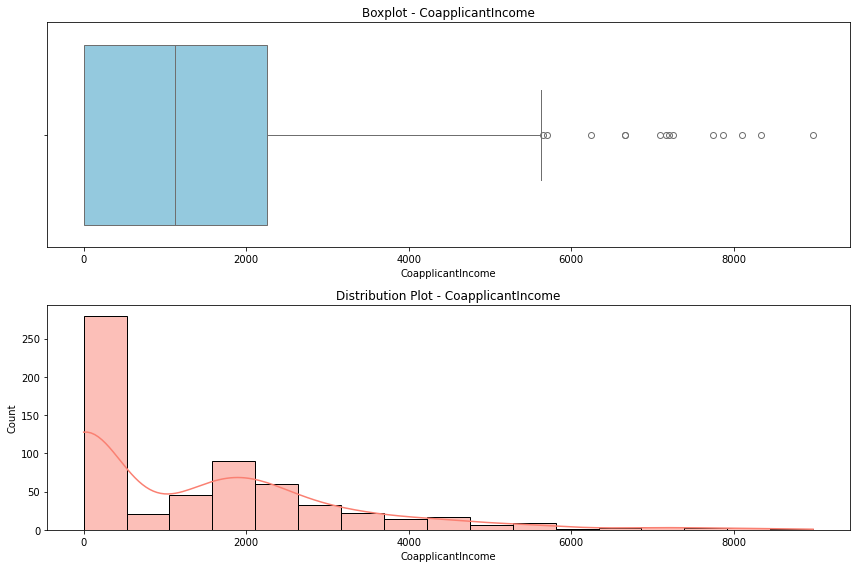

In [10]:
# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Boxplot for the "CoapplicantIncome" column with a different color
sns.boxplot(x="CoapplicantIncome", data=df_new_z, ax=axes[0], color="skyblue")
axes[0].set_title("Boxplot - CoapplicantIncome")

# Distribution plot for the "CoapplicantIncome" column with a different color
sns.histplot(df_new_z["CoapplicantIncome"], ax=axes[1], kde=True, color="salmon")
axes[1].set_title("Distribution Plot - CoapplicantIncome")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
